In [1]:
import pandas as pd

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [5]:
from sklearn.cluster import KMeans

In [26]:
df=pd.read_csv("Social_Network_Ads.csv")

In [27]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

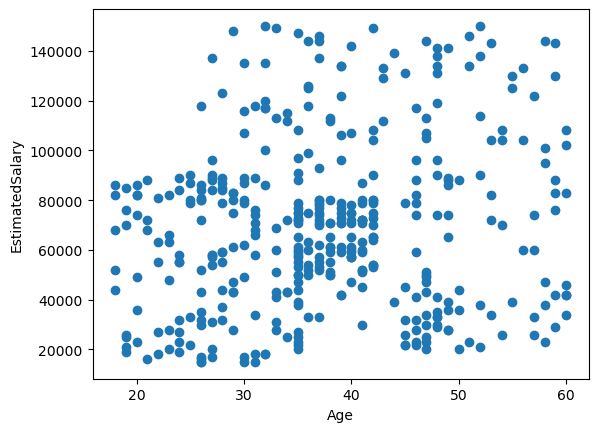

In [30]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

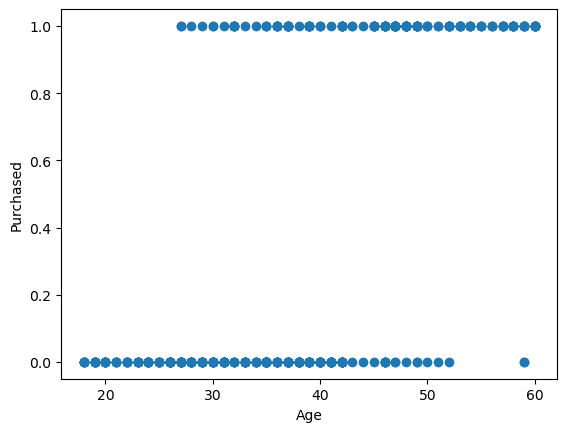

In [31]:
plt.scatter(df['Age'],df['Purchased'])
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

Text(0, 0.5, 'Purchased')

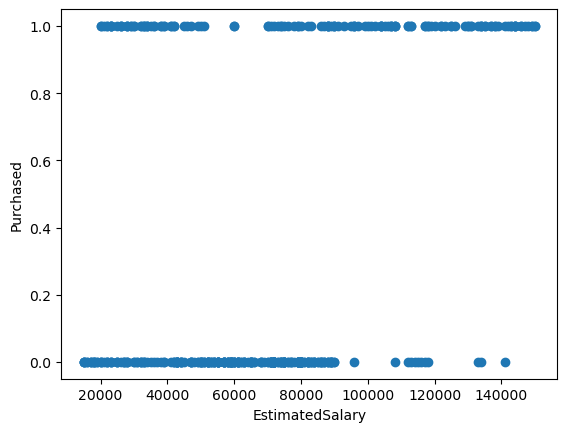

In [32]:
plt.scatter(df["EstimatedSalary"], df["Purchased"])
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")

In [33]:
relevant_cols = ["Age", "EstimatedSalary", 
                 "Purchased"]

customer_df = df[relevant_cols]

In [34]:
customer_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(customer_df)

StandardScaler()

In [38]:
scaled_data = scaler.transform(customer_df)

In [39]:
scaled_data

array([[-1.78179743, -1.49004624, -0.74593581],
       [-0.25358736, -1.46068138, -0.74593581],
       [-1.11320552, -0.78528968, -0.74593581],
       ...,
       [ 1.17910958, -1.46068138,  1.34059793],
       [-0.15807423, -1.07893824, -0.74593581],
       [ 1.08359645, -0.99084367,  1.34059793]])

In [40]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [44]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\mgmce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgmce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgmce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgmce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [45]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

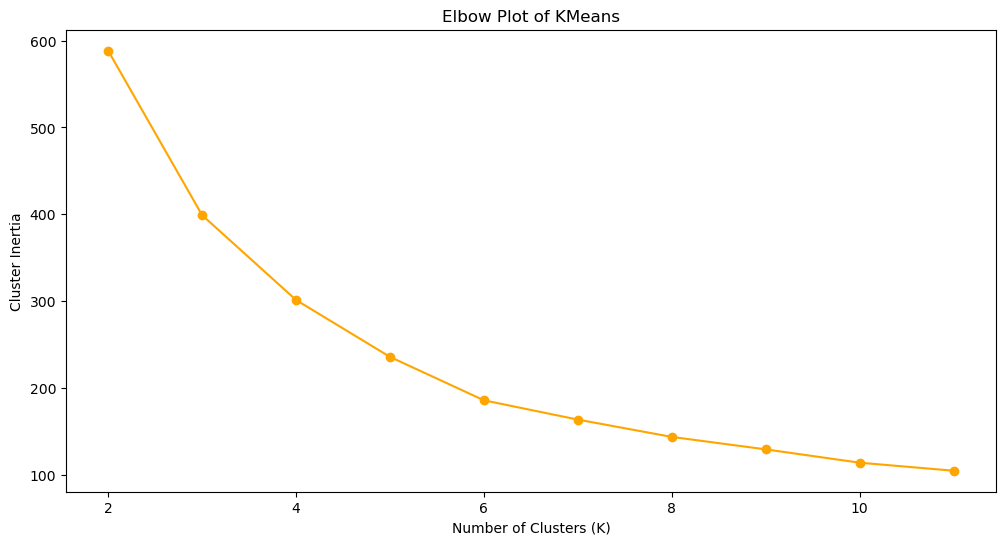

In [46]:
generate_elbow_plot(clusters_centers, k_values)

In [52]:
kmeans_model = KMeans(n_clusters = 4)

In [53]:
kmeans_model.fit(scaled_data)


C:\Users\mgmce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [54]:
df["clusters"] = kmeans_model.labels_

In [55]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased,clusters
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,2


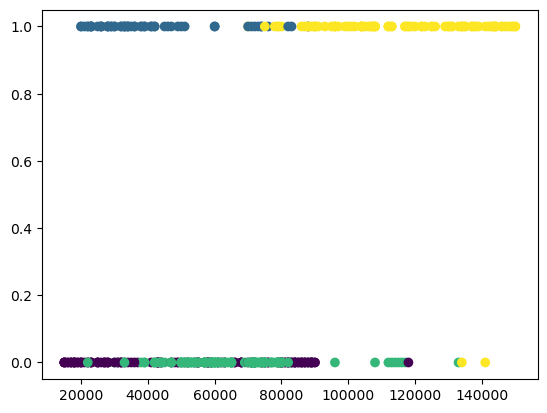

In [56]:
plt.scatter(df["EstimatedSalary"], 
            df["Purchased"], 
            c = df["clusters"]
            )